In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# ==========================
# PART 1 : EDA & BASELINE MODEL
# ==========================

In [1]:
# Chargement des données d'entraînement
train_df = pd.read_csv("conversion_data_train.csv")

NameError: name 'pd' is not defined

In [35]:
# Aperçu des données
print(train_df.head())

   country  age  new_user  source  total_pages_visited  converted
0    China   22         1  Direct                    2          0
1       UK   21         1     Ads                    3          0
2  Germany   20         0     Seo                   14          1
3       US   23         1     Seo                    3          0
4       US   28         1  Direct                    3          0


In [36]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB
None


In [37]:
print(train_df.describe())

                 age       new_user  total_pages_visited      converted
count  284580.000000  284580.000000        284580.000000  284580.000000
mean       30.564203       0.685452             4.873252       0.032258
std         8.266789       0.464336             3.341995       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000


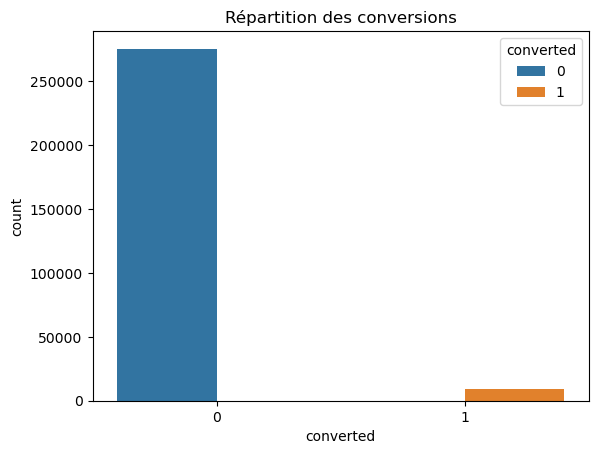

In [38]:
# Analyse des conversions
sns.countplot(x='converted', hue=train_df['converted'].astype(str), data=train_df)
plt.title("Répartition des conversions")
plt.show()

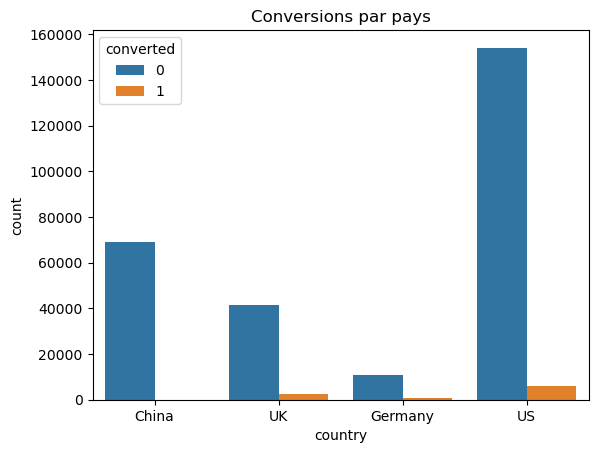

In [39]:
# Analyse de la distribution par pays/source
sns.countplot(x='country', hue=train_df['converted'].astype(str), data=train_df)
plt.title("Conversions par pays")
plt.show()

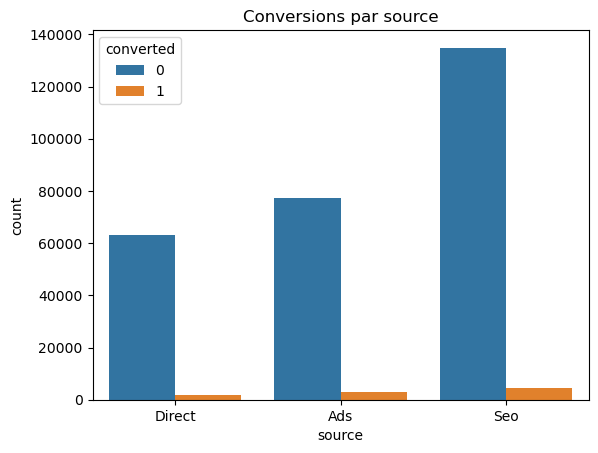

In [40]:
sns.countplot(x='source', hue=train_df['converted'].astype(str), data=train_df)
plt.title("Conversions par source")
plt.show()

In [41]:
# Séparation des features et de la target
y = train_df["converted"]
X = train_df.drop(columns=["converted"])

In [42]:
# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
# Split pour validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
# ====== MODELE 1 : LOGISTIC REGRESSION ======
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_val)

In [45]:
print("\n--- Logistic Regression ---")
f1_score_lr = f1_score(y_val, y_pred_lr)
print("F1-score:", f1_score_lr)
print(classification_report(y_val, y_pred_lr))
print(confusion_matrix(y_val, y_pred_lr))


--- Logistic Regression ---
F1-score: 0.7630878438331854
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55058
           1       0.85      0.69      0.76      1858

    accuracy                           0.99     56916
   macro avg       0.92      0.85      0.88     56916
weighted avg       0.99      0.99      0.99     56916

[[54825   233]
 [  568  1290]]


# ==========================
# PART 2 : AMÉLIORATION DU MODÈLE
# ==========================

In [46]:
# ====== MODELE 2 : RANDOM FOREST ======
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_val)

print("\n--- Random Forest ---")
f1_score_rf = f1_score(y_val, y_pred_rf)
print("F1-score:", f1_score_rf)
print(classification_report(y_val, y_pred_rf))
print(confusion_matrix(y_val, y_pred_rf))


--- Random Forest ---
F1-score: 0.7288666249217283
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55058
           1       0.87      0.63      0.73      1858

    accuracy                           0.98     56916
   macro avg       0.93      0.81      0.86     56916
weighted avg       0.98      0.98      0.98     56916

[[54886   172]
 [  694  1164]]


In [47]:
# ====== MODELE 3 : GRADIENT BOOSTING ======
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_val)

print("\n--- Gradient Boosting ---")
f1_score_gb = f1_score(y_val, y_pred_gb)
print("F1-score:", f1_score_gb)
print(classification_report(y_val, y_pred_gb))
print(confusion_matrix(y_val, y_pred_gb))


--- Gradient Boosting ---
F1-score: 0.7633451957295374
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55058
           1       0.85      0.69      0.76      1858

    accuracy                           0.99     56916
   macro avg       0.92      0.84      0.88     56916
weighted avg       0.99      0.99      0.99     56916

[[54831   227]
 [  571  1287]]


In [48]:
print('Comparaison des F1-scores :')
print(f'Logistic Regression: {f1_score_lr}')
print(f'Random Forest: {f1_score_rf}')
print(f'Gradient Boosting: {f1_score_gb}')


Comparaison des F1-scores :
Logistic Regression: 0.7630878438331854
Random Forest: 0.7288666249217283
Gradient Boosting: 0.7633451957295374


## Utilisation du Modèle Gradient Boosting 

In [ ]:

# Chargement des données de test
X_test = pd.read_csv("conversion_data_test.csv")

# Traitement 
X_test = pd.get_dummies(X_test, drop_first=True)
X_encoded_df = pd.DataFrame(X_scaled, columns=X.columns)
X_test, _ = X_test.align(X_encoded_df, join='right', axis=1, fill_value=0)

X_test_scaled = scaler.transform(X_test)

# Prédictions  
test_predictions = model_gb.predict(X_test_scaled)
submission = pd.DataFrame({"Id": X_test.index, "Converted": test_predictions})
submission.to_csv("conversion_prediction.csv", index=False)

print("\n Fichier généré avec succès")


 Fichier généré avec succès


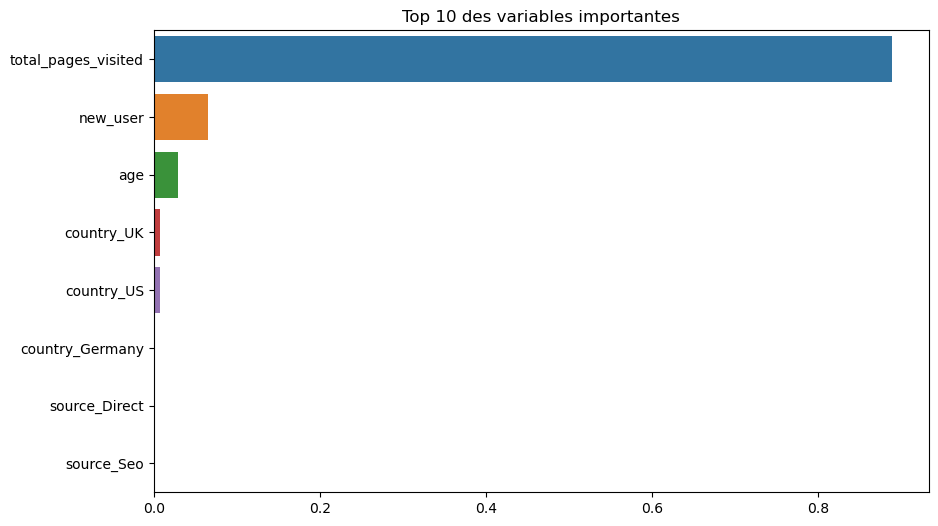

In [50]:
# Importance des variables avec Gradient Boosting
feature_importances = pd.Series(model_gb.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values[:10], y=feature_importances.index[:10])
plt.title("Top 10 des variables importantes")
plt.show()